import numpy as np
import pandas as pd


In [23]:
df = pd.read_csv(r"C:\Users\merve\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.isnull() # verilerde boş veri var mı yok mu diye kontrol eder.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df.eq(0).sum() # kaç başlıkta kaç tane 0 var diye gösterdi

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [28]:
df.shape #768 tane hasta var 9 tane özellik var.

(768, 9)

In [29]:
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'
   ]]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'
   ]].replace(0,np.nan)



In [30]:
#eksik değerleri ortlama değerle doldurduk.
df.fillna(df.mean(), inplace=True)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [32]:
df.isnull().sum() #verisi  eksik olan olan değer var mı yok mu diye kontrol ettik.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
df.eq(0).sum() 
#değeri 0 olanların toplam değerini ver


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [34]:
import seaborn as sns

<Axes: >

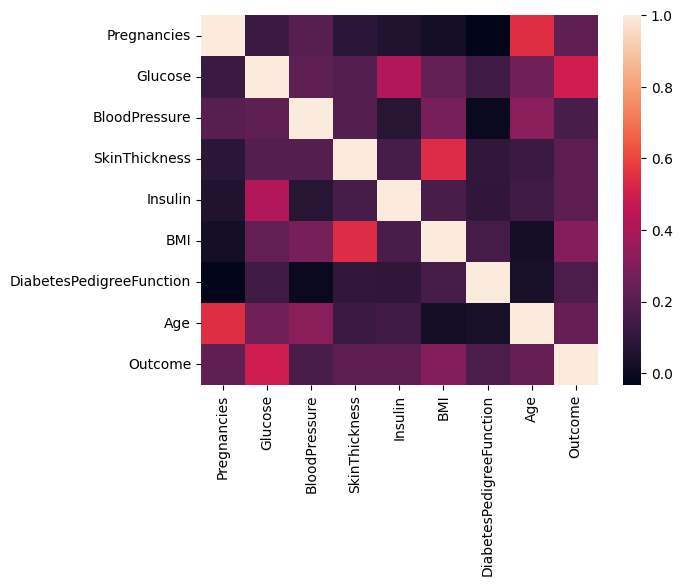

In [35]:
sns.heatmap(df.corr() )# ısı haritası oluştur. açık renklerde yüksek korelasyon var.

In [36]:
#sınıflandırma sayısı artıkça boyutlandırma kalitesi düşer.

feature_names = df.corr().nlargest(4,'Outcome').index 

In [37]:
df.corr().nlargest(4,'Outcome').index.tolist()

['Outcome', 'Glucose', 'BMI', 'Age']

In [38]:
#Kullanıcak Algoritmalar
#1. Lojisitk Regresyon
#2. Destek Vektör Regresyon

In [39]:
#algortimaların oluşturması


In [40]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [41]:
x = df[['Glucose', 'BMI', 'Age']]
y = df.iloc[: ,8] #pandas kütütphanesine ait indeksleme yöntemi

In [43]:
#lojisitk regresyonu çağırıyoruz
log_reg = linear_model.LogisticRegression()

In [45]:
log_reg_score = cross_val_score(log_reg,x,y,cv =10, scoring='accuracy').mean() #her 10 gözlem değerindeki ortalamayı alıp log reg. hesapladık

In [46]:
log_reg_score

np.float64(0.7669856459330144)

In [47]:
results = []
results.append(log_reg_score) # append yükle

In [48]:
results

[np.float64(0.7669856459330144)]

In [49]:
from sklearn import svm 

In [54]:
linear_svm = svm.SVC(kernel='linear')

In [55]:
linear_svm_score = cross_val_score(linear_svm, x,y, cv=10, scoring = 'accuracy').mean()

In [56]:
linear_svm_score

np.float64(0.7656527682843473)

In [ ]:
#bu iki sonuçta lojisitk regresyonu tercih ediyoruz

In [59]:
results.append(linear_svm_score)

In [60]:
results

[np.float64(0.7669856459330144), np.float64(0.7656527682843473)]

In [72]:
import pickle # model kaydetmek için kullanılan kütüphanedir

In [77]:
filename = 'diabets.sav'

In [80]:
#lojisitk resgresyon komutuyla x , y'leri öğrensin
log_reg.fit(x,y)

pickle.dump(log_reg, open(filename,'wb')) # dosyayı yazdı
 #dumb komutu kaydetme anlamında kullanılmış

In [81]:
#modelin çağrılması
loaded_model = pickle.load(open(filename,'rb')) #rb=dosya okuma

In [83]:
loaded_model #model yüklendi

LogisticRegression()

In [88]:
Glucose = 70
BMI = 60
Age = 50
import pandas as pd

# Eğitim sırasında kullanılan özellik isimlerinin 'Glucose', 'BMI', 'Age' olduğunu varsayıyoruz
input_data = pd.DataFrame([[Glucose, BMI, Age]], columns=['Glucose', 'BMI', 'Age'])

# Şimdi tahmin yapın
prediction = loaded_model.predict(input_data)


In [90]:
prediction

array([1])